# Importing Necessary Libraries

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import statistics
import warnings
from scipy import stats
from scipy.stats import skew, norm
warnings.filterwarnings("ignore")
%matplotlib inline
SEED = 12345
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)

In [3]:
train_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.shape

(1460, 81)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [8]:
train_copy = train_data.copy()
test_copy = test_data.copy()


#### Checking the Normality Assumption for the Dependent Variable


 mu = 180921.20 and sigma = 79415.29



Text(0.5, 1.0, 'SalePrice distribution')

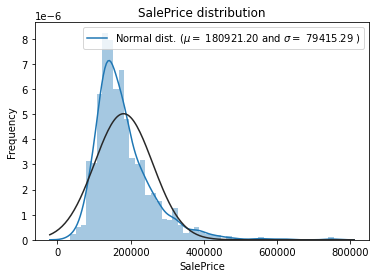

In [9]:
sns.distplot(train_copy['SalePrice'] , fit = norm);

(mu, sigma) = norm.fit(train_copy['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


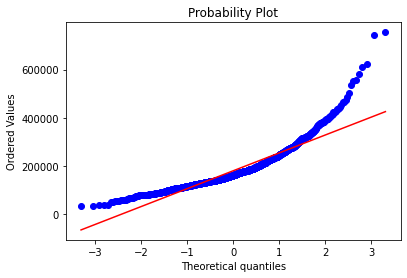

In [10]:
fig = plt.figure()
res = stats.probplot(train_copy['SalePrice'], plot = plt)
plt.show()

#### As we can see that the SalePrice is right-skewed and the Probability Plot is not a desired one, we need to transform our depenedent variable**


 mu = 12.02 and sigma = 0.40



Text(0.5, 1.0, 'SalePrice distribution')

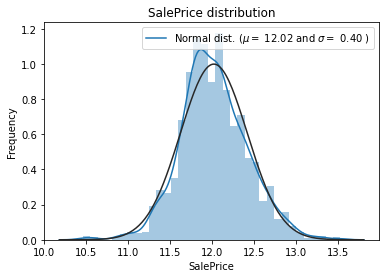

In [11]:
train_copy["SalePrice"] = np.log1p(train_copy["SalePrice"])

sns.distplot(train_copy['SalePrice'] , fit = norm);

(mu, sigma) = norm.fit(train_copy['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


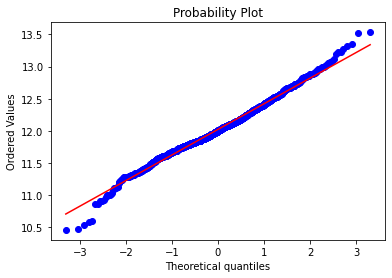

In [12]:
fig = plt.figure()
res = stats.probplot(train_copy['SalePrice'], plot = plt)
plt.show()

# Handling Out Liars!
As we do not want to lose majority of our data we will be removing outliers by considering only one column ie. our High Correlation Column GrLivArea


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

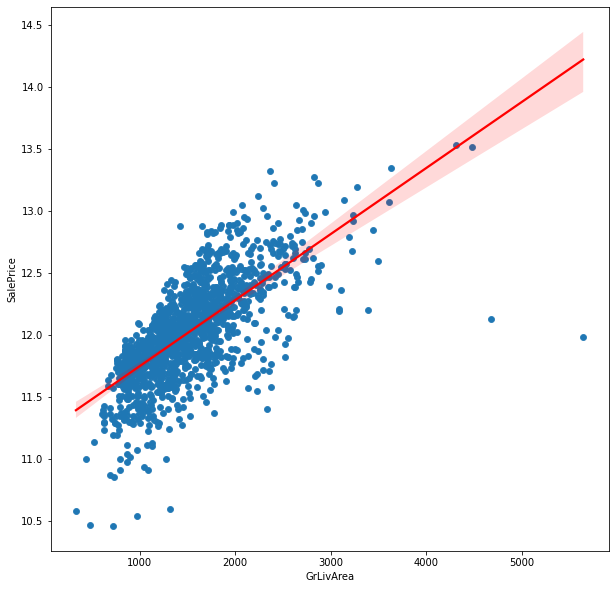

In [13]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = train_copy, x = 'GrLivArea',y = 'SalePrice')
sns.regplot(data = train_copy, x = 'GrLivArea',y = 'SalePrice', line_kws = {'color':'red'})

In [14]:
# From the plot we can input the condition and hence, we succesfully remove the two rows
train_copy = train_copy[~((train_copy['SalePrice'] < 12.5) & (train_copy['GrLivArea'] > 4000))]
train_copy.shape

(1458, 81)

# Exploratory Data Analytics
Lets get a overview of the Sale Price with few independent variables

In [15]:
mean = train_copy.groupby('YearBuilt')['SalePrice'].mean().reset_index()

<AxesSubplot:title={'center':'Sale Price vs Built Years'}, xlabel='YearBuilt', ylabel='SalePrice'>

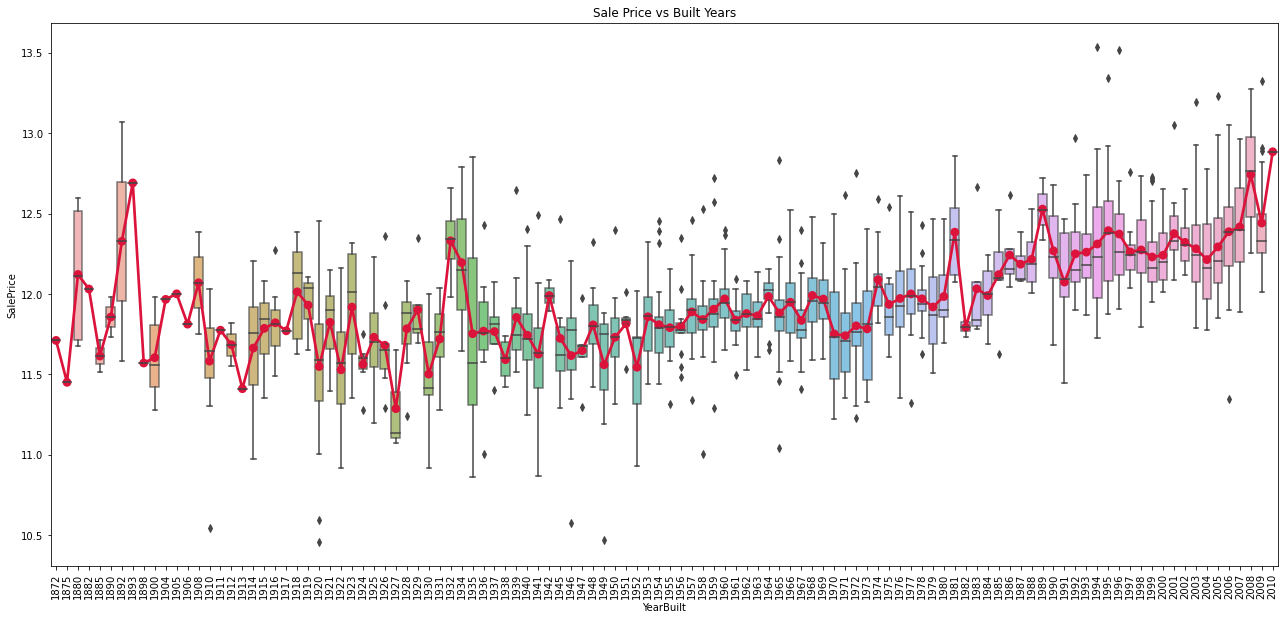

In [16]:
f, ax = plt.subplots(figsize = (22, 10))
plt.xticks(rotation = 90)
plt.title('Sale Price vs Built Years')
sns.boxplot(data = train_copy, x = 'YearBuilt', y = 'SalePrice', boxprops = dict(alpha=.7))
sns.pointplot(data = mean, x = 'YearBuilt', y = 'SalePrice',color = 'crimson', ci = None)

As we can see that the general trend is that the sale prices have increased over a period of time

<AxesSubplot:title={'center':'Sale Price vs Neighborhood'}, xlabel='Neighborhood', ylabel='SalePrice'>

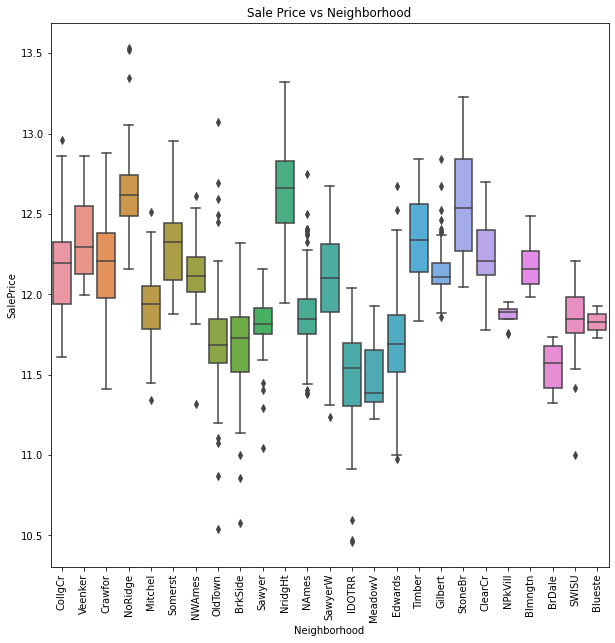

In [17]:
f, ax = plt.subplots(figsize = (10, 10))
plt.xticks(rotation = '90')
plt.title('Sale Price vs Neighborhood')
sns.boxplot(data = train_copy, x = 'Neighborhood',y = 'SalePrice')

The NridgHt has the highest average selling price and off course we do have outliers

<AxesSubplot:title={'center':'Sale Price vs Living Area'}, xlabel='GrLivArea', ylabel='SalePrice'>

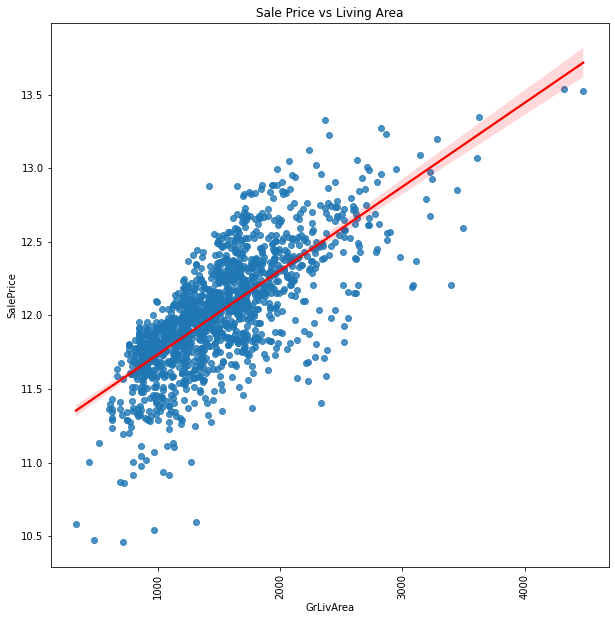

In [18]:
f, ax = plt.subplots(figsize = (10, 10))
plt.xticks(rotation = '90')
plt.title('Sale Price vs Living Area')
sns.regplot(data = train_copy, x = 'GrLivArea',y = 'SalePrice', line_kws = {'color':'red'})

As we can see there is an increasing trend with increase in Living Area which should be the case. Also, we see few outliers skewing the graph. As GrLivArea shows a great fit to Sales Price, it is quite clear that it will have a high correlation with Sale Price. Lets check it out!

<AxesSubplot:>

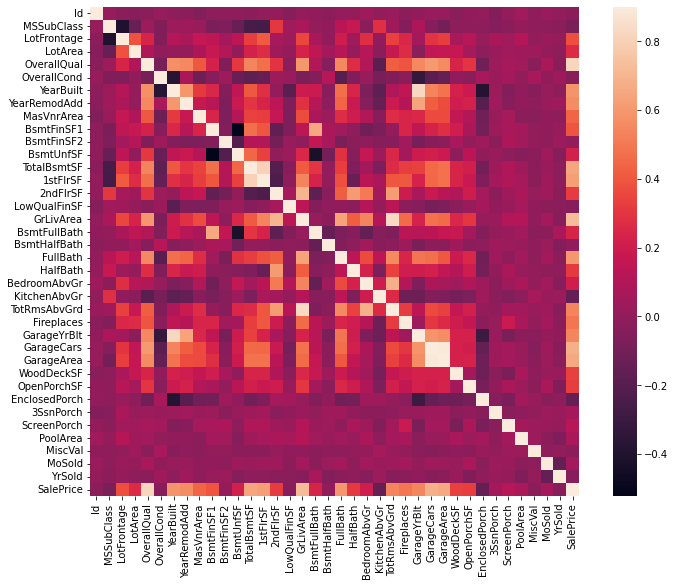

In [19]:
# Correlation Heatmap

corr = train_copy.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr, vmax = 0.9, square = True)

In [20]:
corr['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.821405
GrLivArea        0.725211
GarageCars       0.681033
GarageArea       0.656129
TotalBsmtSF      0.647563
1stFlrSF         0.620500
FullBath         0.595899
YearBuilt        0.587043
YearRemodAdd     0.565992
GarageYrBlt      0.541638
TotRmsAbvGrd     0.537702
Fireplaces       0.491998
MasVnrArea       0.434621
BsmtFinSF1       0.392283
LotFrontage      0.372900
WoodDeckSF       0.334251
OpenPorchSF      0.325215
2ndFlrSF         0.319953
HalfBath         0.314186
LotArea          0.260544
BsmtFullBath     0.237099
BsmtUnfSF        0.221892
BedroomAbvGr     0.209035
ScreenPorch      0.121245
PoolArea         0.074338
MoSold           0.057064
3SsnPorch        0.054914
BsmtFinSF2       0.004863
BsmtHalfBath    -0.005124
Id              -0.017774
MiscVal         -0.020012
OverallCond     -0.036821
YrSold          -0.037151
LowQualFinSF    -0.037951
MSSubClass      -0.073969
KitchenAbvGr    -0.147534
EnclosedPorch   -0.149029
Name: SalePr

# Feature Engineering

While conducting feature engineering it is highly crucial to avoid the phenomena of Data Leakage. Data Leakage is the phenomena where your model is exposed to unseen or test data. There exist several reasons why Data Leakage can occur, out of which one, our current area of focus, is conducting Feature Engineering by combining train and test data. However, we would not be replacing a lot of missing values by mean, median or mode, rather we will be conducting a practical scenarion and try to make sense of the data and replace the null values accordingly. Let's Begin!

In [21]:
total_data = pd.concat((train_copy, test_copy)).reset_index(drop = True)
total_data.drop(['SalePrice'], axis = 1, inplace = True)

In [22]:
# Checking for null values
total_data.isnull().sum().sort_values(ascending = False)

PoolQC           2908
MiscFeature      2812
Alley            2719
Fence            2346
FireplaceQu      1420
LotFrontage       486
GarageYrBlt       159
GarageFinish      159
GarageQual        159
GarageCond        159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
BsmtHalfBath        2
BsmtFullBath        2
Utilities           2
GarageCars          1
KitchenQual         1
BsmtFinSF1          1
SaleType            1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Exterior2nd         1
Exterior1st         1
GarageArea          1
Electrical          1
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
Id                  0
HalfBath            0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea  

In [23]:
# Getting the Percentage of Missing Values and converting into Dataframe
null_data = ((total_data.isnull().sum() / total_data.shape[0]) * 100).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing_Percentage' :null_data})

In [24]:
missing_data

,Missing_Percentage
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageYrBlt,5.450806
GarageFinish,5.450806
GarageQual,5.450806
GarageCond,5.450806


<AxesSubplot:ylabel='Missing_Percentage'>

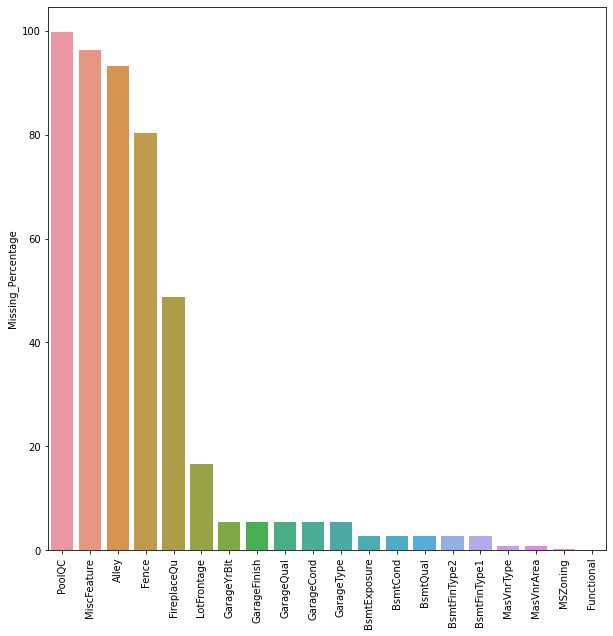

In [25]:
f, ax = plt.subplots(figsize = (10, 10))
plt.xticks(rotation='90')
sns.barplot(x = missing_data.index[:20], y = missing_data.Missing_Percentage[:20])

In [26]:
for cols in total_data.select_dtypes(include = 'object'):
  print(cols,total_data[cols].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
Street ['Pave' 'Grvl']
Alley [nan 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa' nan]
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosA' 'PosN' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll']
Exterior1st ['VinylSd' 'MetalSd' 'W

In [27]:
# PoolQC - Pool Quality nan can be considered as there might be no Pool and hence no Pool Quality, hence replace with None. Similarly considering the same assumption will the columns
total_data['PoolQC'] = total_data['PoolQC'].fillna('None')

In [28]:
total_data['MiscFeature'] = total_data['MiscFeature'].fillna('None')

In [29]:
total_data['Alley'] = total_data['Alley'].fillna('None')

In [30]:
total_data['Fence'] = total_data['Fence'].fillna('None')

In [31]:
total_data['FireplaceQu'] = total_data['FireplaceQu'].fillna('None')

In [32]:
# As we have a column i.e Neighborhood lets replace missing values with the median of the neighborhood as we might have a smilar area
total_data['LotFrontage'] = total_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [33]:
# Replacing with None as we can see the percentage of null values are the same for all these columns hence we can say that there is no garage 
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    total_data[col] = total_data[col].fillna('None')


In [34]:
# Replacing with Zero for the Garage Year Built column as it makes sense to not have a garage

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    total_data[col] = total_data[col].fillna(0)

In [35]:
# Similarly the categorical basement variables with missing values implies no basement
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    total_data[col] = total_data[col].fillna(0)


In [36]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    total_data[col] = total_data[col].fillna('None')

In [37]:
# For the below variables we can assume that ther was no Masonry veneer type and Masonry veneer Area in Sqft
total_data["MasVnrType"] = total_data["MasVnrType"].fillna("None")
total_data["MasVnrArea"] = total_data["MasVnrArea"].fillna(0)

In [38]:
total_data['MSZoning'] = total_data['MSZoning'].fillna(total_data['MSZoning'].mode()[0])

In [39]:
total_data.groupby('Utilities').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Utilities,,,,,,,,,,,,,,,,,,,,,
AllPub,2914,2914,2914,2914,2914,2914,2914,2914,2914,2914,...,2914,2914,2914,2914,2914,2914,2914,2914,2913,2914
NoSeWa,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [40]:
# As we can see all the values are same rather than hence, it wont help in our prediction
total_data = total_data.drop(['Utilities'], axis = 1)

In [41]:
total_data.groupby('Functional').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Functional,,,,,,,,,,,,,,,,,,,,,
Maj1,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
Maj2,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
Min1,65,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
Min2,70,70,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
Mod,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
Sev,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Typ,2715,2715,2715,2715,2715,2715,2715,2715,2715,2715,...,2715,2715,2715,2715,2715,2715,2715,2715,2714,2715


In [42]:
total_data["Functional"] = total_data["Functional"].fillna("Typ")

In [43]:
total_data.groupby('Electrical').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Electrical,,,,,,,,,,,,,,,,,,,,,
FuseA,188,188,188,188,188,188,188,188,188,188,...,188,188,188,188,188,188,188,188,188,188
FuseF,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
FuseP,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
Mix,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
SBrkr,2669,2669,2669,2669,2669,2669,2669,2669,2669,2669,...,2669,2669,2669,2669,2669,2669,2669,2669,2668,2669


In [44]:
# Replacing Mode for Elecectrical Column as it has only one null value
total_data['Electrical'] = total_data['Electrical'].fillna(total_data['Electrical'].mode()[0])

In [45]:
total_data.groupby('KitchenQual').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
KitchenQual,,,,,,,,,,,,,,,,,,,,,
Ex,203,203,203,203,203,203,203,203,203,203,...,203,203,203,203,203,203,203,203,203,203
Fa,70,70,70,70,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
Gd,1151,1151,1151,1151,1151,1151,1151,1151,1151,1151,...,1151,1151,1151,1151,1151,1151,1151,1151,1151,1151
TA,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,...,1492,1492,1492,1492,1492,1492,1492,1492,1491,1492


In [46]:
total_data['KitchenQual'] = total_data['KitchenQual'].fillna(total_data['KitchenQual'].mode()[0])

In [47]:
total_data.groupby('Exterior1st').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Exterior1st,,,,,,,,,,,,,,,,,,,,,
AsbShng,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44
AsphShn,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
BrkComm,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
BrkFace,87,87,87,87,87,87,87,87,87,87,...,87,87,87,87,87,87,87,87,87,87
CBlock,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
CemntBd,125,125,125,125,125,125,125,125,125,125,...,125,125,125,125,125,125,125,125,125,125
HdBoard,442,442,442,442,442,442,442,442,442,442,...,442,442,442,442,442,442,442,442,442,442
ImStucc,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
MetalSd,450,450,450,450,450,450,450,450,450,450,...,450,450,450,450,450,450,450,450,450,450


In [48]:
total_data.groupby('Exterior2nd').count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Exterior2nd,,,,,,,,,,,,,,,,,,,,,
AsbShng,38,38,38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
AsphShn,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Brk Cmn,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
BrkFace,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
CBlock,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
CmentBd,125,125,125,125,125,125,125,125,125,125,...,125,125,125,125,125,125,125,125,125,125
HdBoard,406,406,406,406,406,406,406,406,406,406,...,406,406,406,406,406,406,406,406,406,406
ImStucc,15,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
MetalSd,447,447,447,447,447,447,447,447,447,447,...,447,447,447,447,447,447,447,447,447,447


In [49]:
total_data['Exterior1st'] = total_data['Exterior1st'].fillna(total_data['Exterior1st'].mode()[0])
total_data['Exterior2nd'] = total_data['Exterior2nd'].fillna(total_data['Exterior2nd'].mode()[0])

In [50]:
total_data.groupby(['SaleType']).count()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleCondition
SaleType,,,,,,,,,,,,,,,,,,,,,
COD,87,87,87,87,87,87,87,87,87,87,...,87,87,87,87,87,87,87,87,87,87
CWD,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
Con,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
ConLD,26,26,26,26,26,26,26,26,26,26,...,26,26,26,26,26,26,26,26,26,26
ConLI,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
ConLw,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
New,237,237,237,237,237,237,237,237,237,237,...,237,237,237,237,237,237,237,237,237,237
Oth,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
WD,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525,...,2525,2525,2525,2525,2525,2525,2525,2525,2525,2525


In [51]:
total_data['SaleType'] = total_data['SaleType'].fillna(total_data['SaleType'].mode()[0])

In [52]:
total_data['MSSubClass'] = total_data['MSSubClass'].fillna("None")

In [53]:
# Rechecking for Null Values
total_data.isnull().sum().sort_values(ascending = False)

Id               0
BedroomAbvGr     0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
HalfBath         0
GarageFinish     0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageYrBlt      0
GarageCars       0
CentralAir       0
PoolArea         0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
PoolQC           0
ScreenPorch      0
GarageArea       0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
Electrical       0
HeatingQC        0
MSSubClass       0
LandSlope        0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LotConfig        0
YearRemodAdd     0
LandContour      0
LotShape    

# Feature Engineering Extended

In [54]:
# Transforming some numerical variables that are really categorical

#MSSubClass is the building class
total_data['MSSubClass'] = total_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
total_data['OverallCond'] = total_data['OverallCond'].astype(str)

#Year and month sold transformed into categorical features.
total_data['YrSold'] = total_data['YrSold'].astype(str)
total_data['MoSold'] = total_data['MoSold'].astype(str)



In [55]:
# Encoding Certain Categorical Ordinal Variables

from sklearn.preprocessing import LabelEncoder
columns = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for cols in columns:
    lbl = LabelEncoder() 
    lbl.fit(list(total_data[cols].values)) 
    total_data[cols] = lbl.transform(list(total_data[cols].values))

In [56]:
# Inorder to reduce number of columns and also to create a more general view, lets compute a new column of Area by adding different area columns
total_data['TotalSF'] = total_data['TotalBsmtSF'] + total_data['1stFlrSF'] + total_data['2ndFlrSF']

In [57]:
# Calculating Skeweness for numerical features

numeric_feat = total_data.dtypes[total_data.dtypes != 'object'].index

In [58]:
skewed_feat = total_data[numeric_feat].apply(lambda x: skew(x)).sort_values(ascending = False)
skew_df = pd.DataFrame({'Skew' :skewed_feat})
skew_df

,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [59]:
# Conducting Log Transformation for the skewed features

skew_df = skew_df[abs(skew_df) > 0.75]
skewed_features = skew_df.index

In [60]:
total_data[skewed_features] = np.log1p(total_data[skewed_features])

In [61]:
# Getting Dummy Variables
total_data = pd.get_dummies(total_data)
print(total_data.shape)

(2917, 221)


# Modelling
We will be looking towards:


* The Penalized Regression Models(Ridge Regression and Lassa Regression) as have a large number of features. Also, the ElasticNet
* XGBRegressor



In [62]:
# Splitting Data into training and test

train = total_data[:train_copy.shape[0]]
test = total_data[train_copy.shape[0]:]
y_train = train_copy.SalePrice.values


In [63]:
print("Shape of Training Data:",train.shape)
print("Shape of Testing Data:",test.shape)

Shape of Training Data: (1458, 221)
Shape of Testing Data: (1459, 221)


In [64]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [65]:
n_folds = 5

def cross_val(model):
    kf = KFold(n_folds, shuffle = True, random_state = 42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring = "neg_mean_squared_error", cv = kf))
    return(rmse)

As regressions are senstitve to outliers we will be using the Robust Scalar module to make it robust to outliers

In [66]:
# Ridge Regression
model_ridge = make_pipeline(RobustScaler(),Ridge(alpha = 0.0005,random_state = 1))

In [67]:
# Lasso Regression
model_lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))

In [68]:
# Elastic Net
model_enet = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.0005, l1_ratio = .5, random_state = 3))

In [69]:
model_xgb = xgb.XGBRegressor(colsample_bytree = 0.3, gamma = 0.06, 
                             learning_rate = 0.05, max_depth = 4, 
                             min_child_weight = 1.5, n_estimators = 2200,
                             reg_alpha = 0.4, reg_lambda = 0.8,
                             subsample = 0.5, silent = 1,
                             random_state = 4)

In [70]:
score = cross_val(model_ridge)
print("Ridge: {:.2f} {:.2f}".format(score.mean(),score.std()))


Ridge: 0.13 0.01


In [71]:
score = cross_val(model_lasso)
print("Lasso: {:.2f} {:.2f}".format(score.mean(),score.std()))


Lasso: 0.11 0.01


In [72]:
score = cross_val(model_enet)
print("Elastic Net: {:.2f} {:.2f}".format(score.mean(),score.std()))


Elastic Net: 0.11 0.01


In [73]:
score = cross_val(model_xgb)
print("XGB: {:.2f} {:.2f}".format(score.mean(),score.std()))


[19:44:39] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:44:52] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[19:45:04] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting fl

#### As we can see the mean error for Elastic Net and Lasso Regression is the minimum, we will be using Elastic Net for predictions

# Predictions

In [74]:
model_enet.fit(train.values,y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('elasticnet', ElasticNet(alpha=0.0005, random_state=3))])

In [75]:
predictions = model_enet.predict(test)

In [76]:
submission = pd.DataFrame({'ID':test_copy.Id,'SalePrice':predictions})

In [77]:
submission.to_csv("submission.csv", index = False)